# Projeto

## Classification

## Decision Trees Approach

In [1]:
import dslabs_functions as dslabs
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show
import dslabs_functions as dslabs

file_tag = "Credit_Score"
## Train - resultado do balancing escolhido (over no nosso caso)
train_filename = "data_preparation_final_results_1/data_preparation_csvs/balancing_csvs/data_balancing_alt2_over.csv"
## ficheiro Teste ao qual nao fazemos balancing
test_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv"
target = "Credit_Score"
# default
eval_metric = "accuracy"

trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=113752 Test#=20000
Labels=[0.0, 1.0]


### Parameters Study

Train#=113752 Test#=20000
Labels=[0.0, 1.0]
DT best with gini and d=26


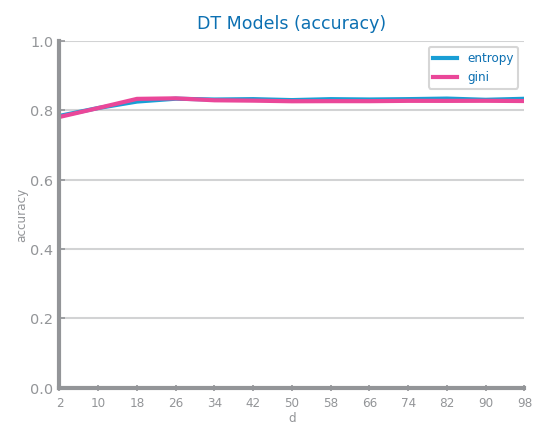

In [2]:
trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(train_filename, test_filename, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

figure()
best_model, params = dslabs.trees_study(trnX, trnY, tstX, tstY, d_max=100, metric=eval_metric)
savefig(f'classification_images/decision_tree/{file_tag}_dt_{eval_metric}_study.png')
show()

### Best Model Performance

<Figure size 600x450 with 0 Axes>

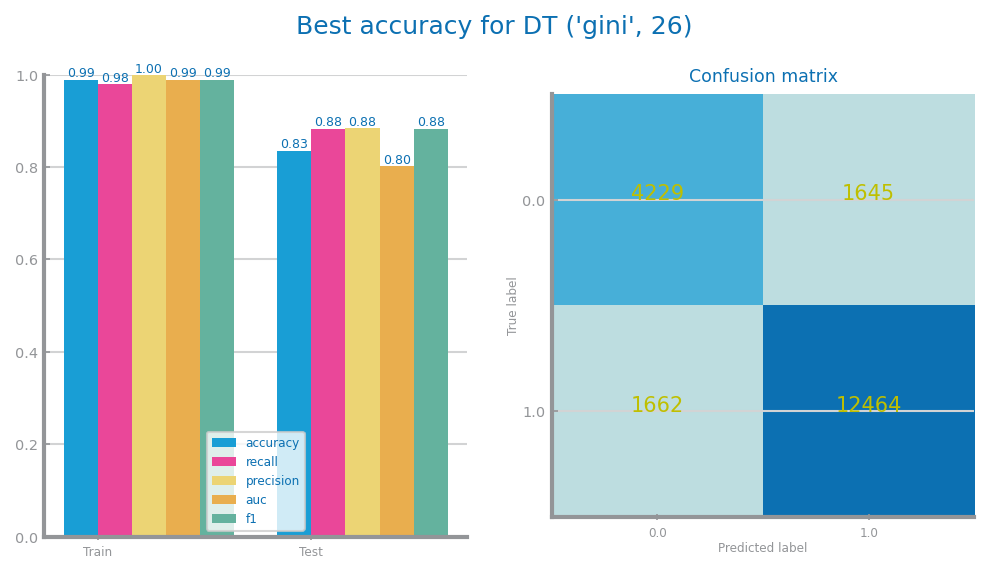

In [3]:
prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/decision_tree/{file_tag}_dt_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### Variables Importance

In [11]:
import os
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis
from subprocess import call

tree_filename: str = f"classification_images/decision_tree/{file_tag}_dt_{eval_metric}_best_tree"

max_depth2show = 3
st_labels: list[str] = [str(value) for value in labels]

dot_data: str = export_graphviz(
    best_model,
    out_file=tree_filename + ".dot",
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    special_characters=True,
    precision=2,
)

print("Current Directory:", os.getcwd())
print("Files in Directory:", os.listdir())
print("Command:", ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"])

# Convert to png
call(
    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]
)

figure(figsize=(14, 6))
imshow(imread(tree_filename + ".png"))
axis("off")
show()

Current Directory: c:\Users\franc\Desktop\TECNICO\Cadeiras\1_semestre\2Periodo\CD\Projeto\CD_IST\dataset_services
Files in Directory: ['classification_images', 'class_credit_score.csv', 'config.py', 'data_balancing.ipynb', 'data_enconding.ipynb', 'data_mv_imputation.ipynb', 'data_outliers_treatment.ipynb', 'data_preparation_csvs', 'data_preparation_final_results_1', 'data_preparation_images', 'data_scaling.ipynb', 'decision_tree.ipynb', 'dslabs.mplstyle', 'dslabs_functions.py', 'francisco.ipynb', 'images', 'knn.ipynb', 'naive_bayes.ipynb', 'ruben.ipynb', 'rubene', '__MACOSX', '__pycache__']
Command: ['dot', '-Tpng', 'classification_images/decision_tree/Credit_Score_dt_accuracy_best_tree.dot', '-o', 'classification_images/decision_tree/Credit_Score_dt_accuracy_best_tree.png', '-Gdpi=600']


FileNotFoundError: [WinError 2] O sistema não conseguiu localizar o ficheiro especificado